# 基础用法

In [1]:
# 载入 tensorflow
import tensorflow as tf

# Build our graph nodes, starting from the inputs
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

# Open up a TensorFlow Session
sess = tf.Session()

# Execute our output node, using our Session
output = sess.run(e)

# Open a TensorFlow FileWriter to write our graph to disk
writer = tf.summary.FileWriter('../graph/my_graph', sess.graph)

# Close our FileWriter and Session objects
writer.close()
sess.close()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


为了运行 TensorBoard 需要在 command 执行:

```
$ tensorboard --logdir='./my_graph'
```

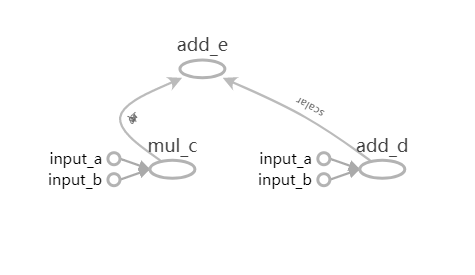

In [2]:
from IPython.display import Image

Image('img/png.png', width=400, height=80)

# Name Scope

In [3]:
import tensorflow as tf

with tf.name_scope("Scope_A"):
    a = tf.add(1, 2, name="A_add")
    b = tf.multiply(a, 3, name="A_mul")

with tf.name_scope("Scope_B"):
    c = tf.add(4, 5, name="B_add")
    d = tf.multiply(c, 6, name="B_mul")

e = tf.add(b, d, name="output")

writer = tf.summary.FileWriter('../graph/name_scope_1', graph=tf.get_default_graph())
writer.close()

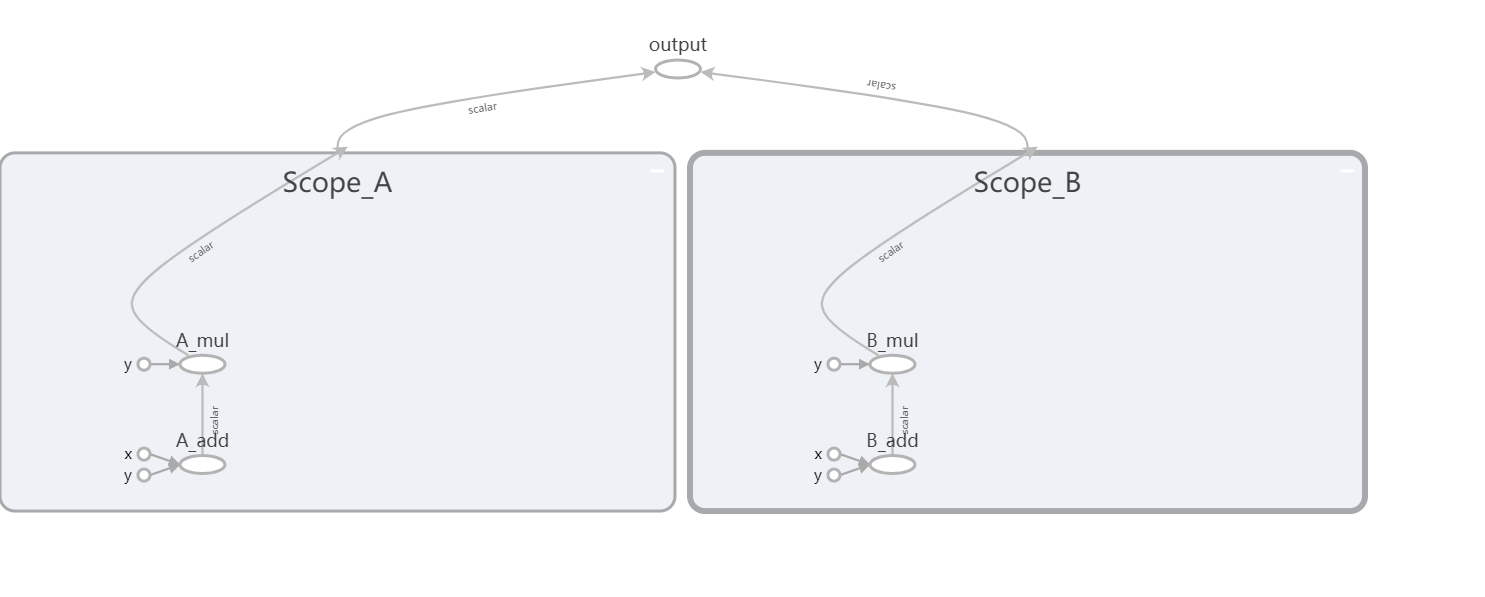

In [6]:
Image('img/name_scope.png', width=600, height=200)

# Graph

In [8]:
graph = tf.Graph()

with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name="input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")

    with tf.name_scope("Transformation"):

        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)

        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)

        with tf.name_scope("C"):
            C_div = tf.div(A_out, B_out)
            C_out = tf.add(C_div, const)

        with tf.name_scope("D"):
            D_div = tf.div(B_out, A_out)
            D_out = tf.add(D_div, const)

    out = tf.maximum(C_out, D_out)   

writer = tf.summary.FileWriter('../graph/name_scope_2', graph=graph)
writer.close()

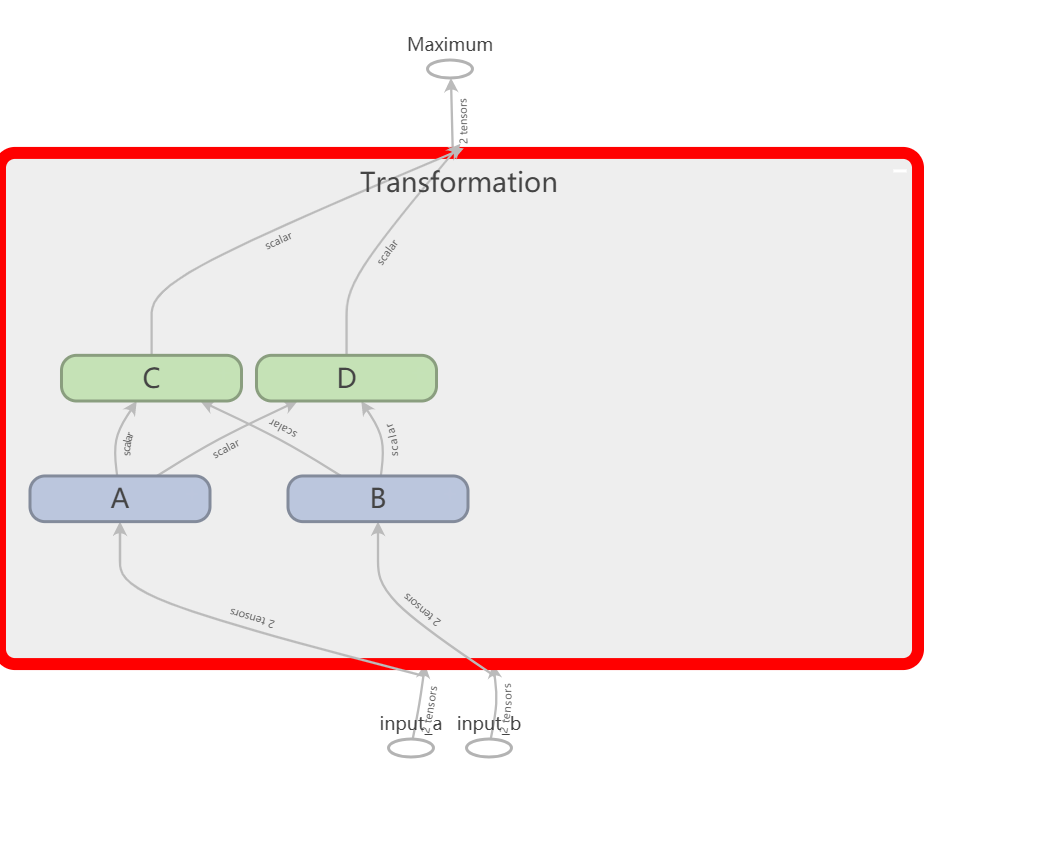

In [9]:
Image('img/graph.png', width=600, height=200)

In [15]:
# Explicitly create a Graph object
graph = tf.Graph()

with graph.as_default():
    
    with tf.name_scope("variables"):
        # Variable to keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, name="global_step")
        
        # Variable that keeps track of the sum of all output values over time:
        total_output = tf.Variable(0.0, dtype=tf.float32, name="total_output")
    
    # Primary transformation Operations
    with tf.name_scope("transformation"):
        
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector 
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
    
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
        
        # Separate output layer
        with tf.name_scope("output"):
            output = tf.add(b, c, name="output")
        
    with tf.name_scope("update"):
        # Increments the total_output Variable by the latest output
        update_total = total_output.assign_add(output)
        
        # Increments the above `global_step` Variable, should be run whenever the graph is run
        increment_step = global_step.assign_add(1)
    
    # Summary Operations
    with tf.name_scope("summaries"):
        avg = tf.div(update_total, tf.cast(increment_step, tf.float32), name="average")
        
        # Creates summaries for output node
        tf.summary.scalar('Output', output)
        tf.summary.scalar('Sum of outputs over time', update_total)
        tf.summary.scalar('Average of outputs over time', avg)
    
    # Global Variables and Operations
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.initialize_all_variables()    
        # Merge all summaries into one Operation
        merged_summaries = tf.summary.merge_all()

# Start a Session, using the explicitly created Graph
sess = tf.Session(graph=graph)

# Open a SummaryWriter to save summaries
writer = tf.summary.FileWriter('../graph/improved_graph', graph)

# Initialize Variables
sess.run(init)

INFO:tensorflow:Summary name Sum of outputs over time is illegal; using Sum_of_outputs_over_time instead.
INFO:tensorflow:Summary name Average of outputs over time is illegal; using Average_of_outputs_over_time instead.


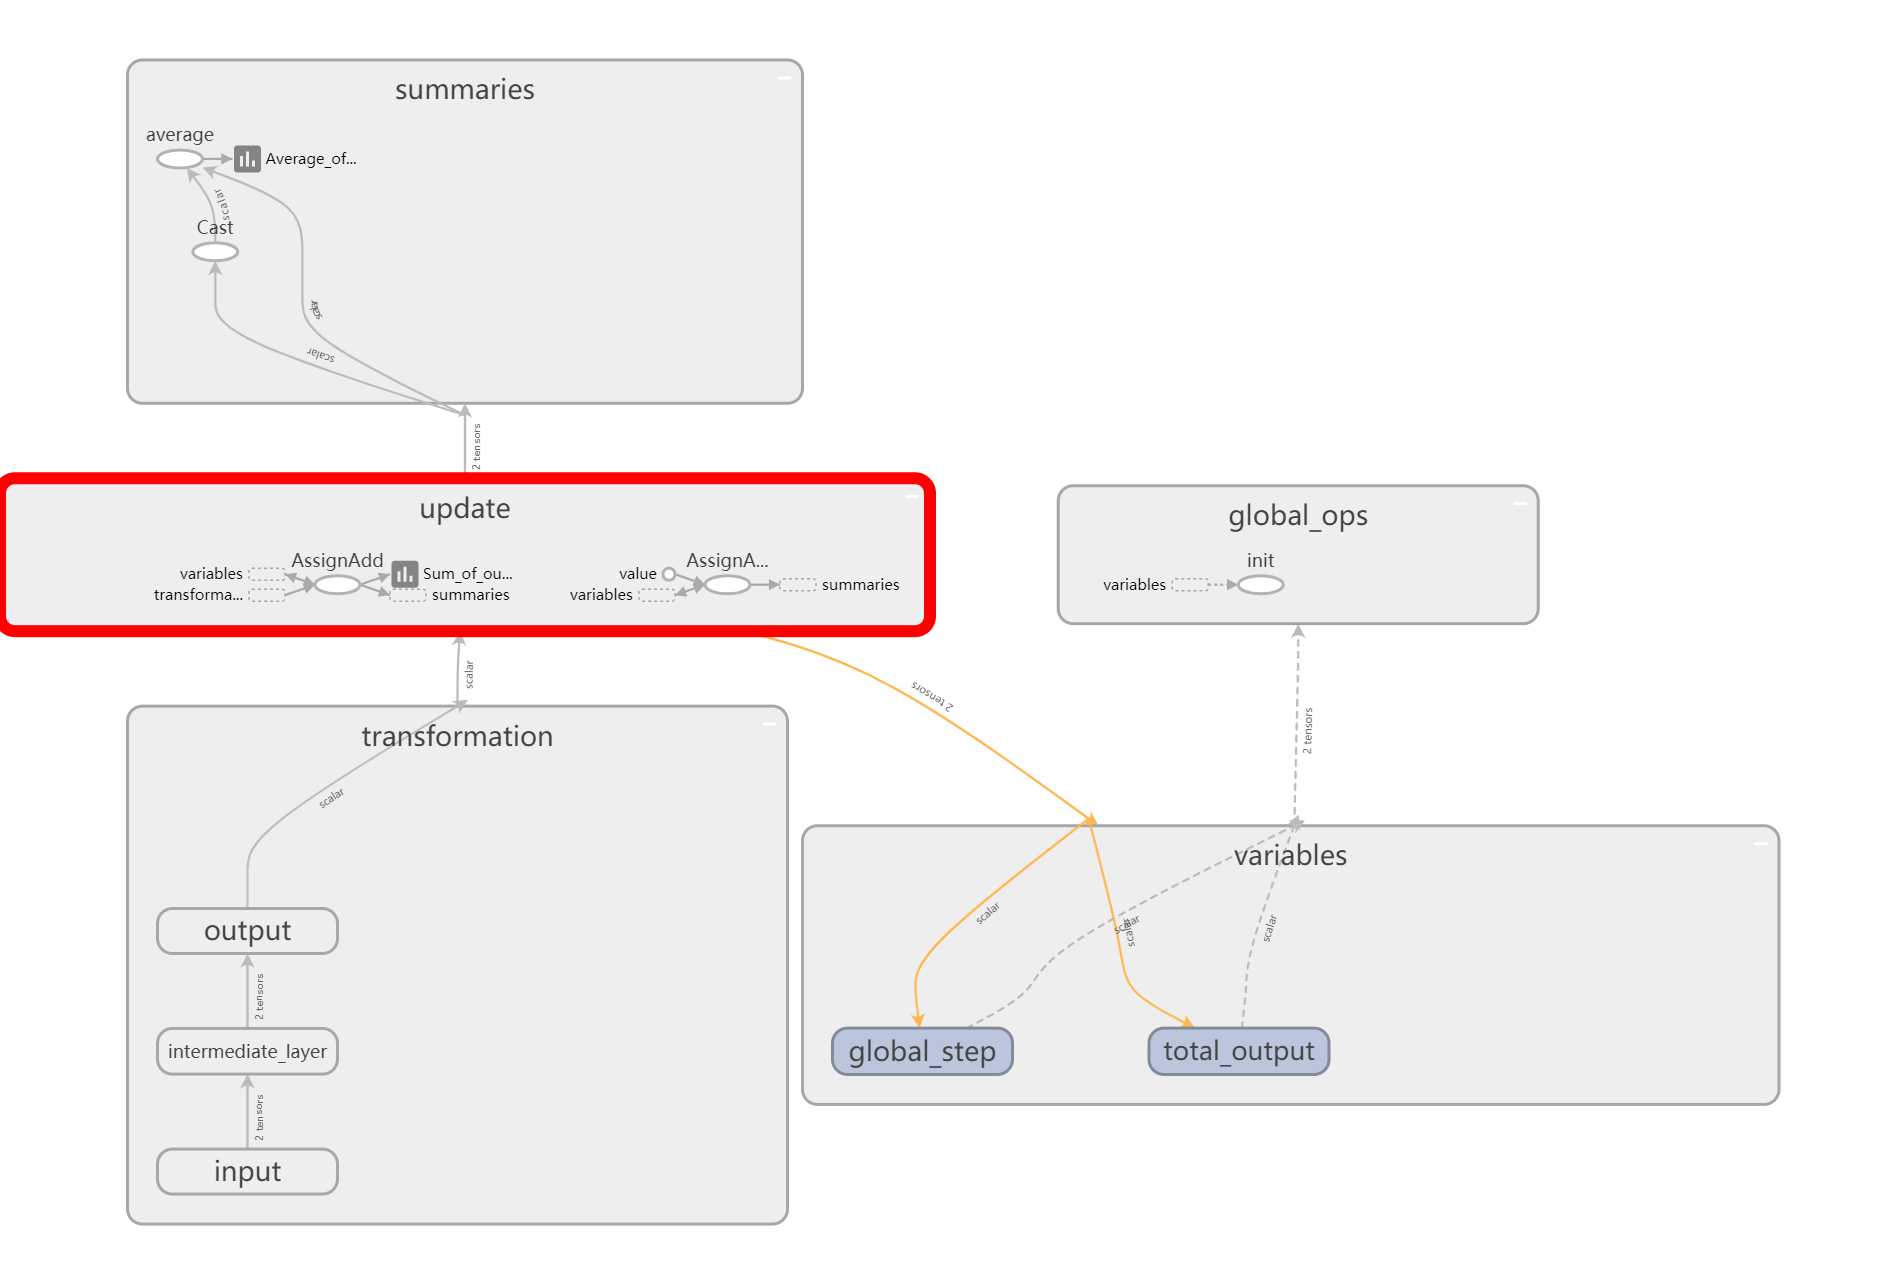

In [17]:
Image('img/improved.png', width=600, height=200)

In [18]:
def run_graph(input_tensor):
    """
    Helper function; runs the graph with given input tensor and saves summaries
    """
    feed_dict = {a: input_tensor}
    out, step, summary = sess.run([output, increment_step, merged_summaries], feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)

In [19]:
# Run the graph with various inputs
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
run_graph([1,2,3])
run_graph([11,4])
run_graph([4,1])
run_graph([7,3,1])
run_graph([6,3])
run_graph([0,2])
run_graph([4,5,6])

In [20]:
# Write the summaries to disk
writer.flush()

# Close the SummaryWriter
writer.close()

# Close the session
sess.close()

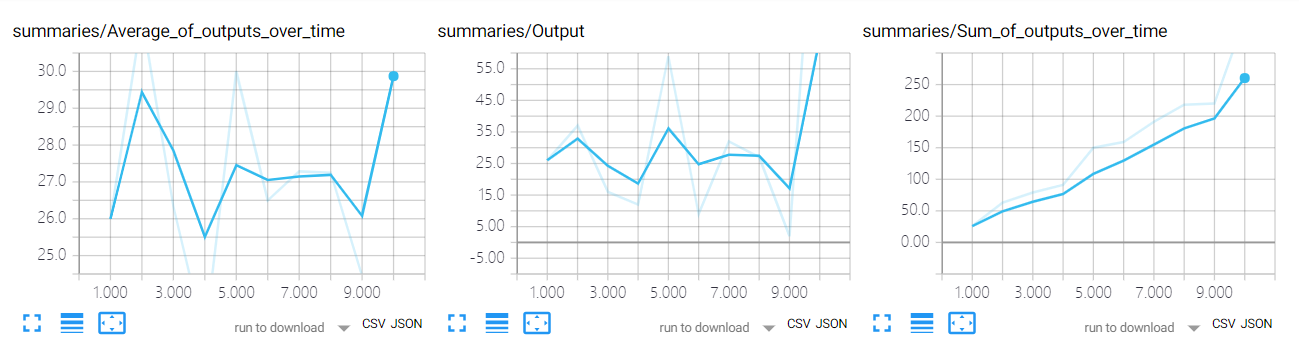

In [21]:
Image('img/scalar.png', width=600, height=200)